In [212]:
!pip install fairlearn

In [213]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from fairlearn.metrics import demographic_parity_ratio
from sklearn.inspection import permutation_importance
from itertools import permutations


In [214]:
df = pd.read_csv("hiring_decisions.csv")

In [215]:
df.isnull().sum()

,0
id,0
Age,0
Gender,0
EducationLevel,0
ExperienceYears,0
PreviousCompanies,0
DistanceFromCompany,0
InterviewScore,0
SkillScore,0
PersonalityScore,0


In [216]:
df

,id,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,0,26,1,2,0,3,26.783828,48,78,91,1,1
1,1,39,1,4,12,3,25.862694,35,68,80,2,1
2,2,48,0,2,3,2,9.920805,20,67,13,2,0
3,3,34,1,2,5,2,6.407751,36,27,70,3,0
4,4,30,0,1,6,1,43.105343,23,52,85,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1495,48,0,2,3,4,9.183783,66,3,80,3,1
1496,1496,27,1,2,10,3,14.847731,43,97,7,2,0
1497,1497,24,1,1,1,2,4.289911,31,91,58,1,1
1498,1498,48,0,2,4,4,36.299263,9,37,44,2,1


([<matplotlib.patches.Wedge at 0x7d9b29f74940>,
 [Text(-0.6182917088228987, 0.90978863633311, '0'),
  Text(0.6182917088228985, -0.9097886363331101, '1')])

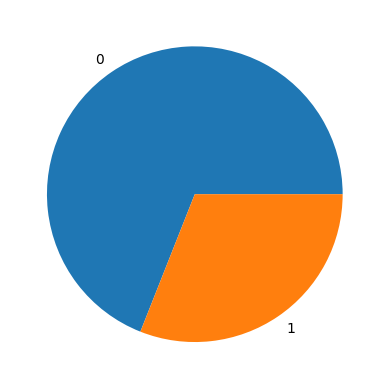

In [217]:
df['HiringDecision'].value_counts()/len(df)
labels = ['0', '1']
plt.pie(df['HiringDecision'].value_counts()/len(df), labels = labels)

In [218]:
df.drop(columns = ['id'], inplace = True)

In [219]:
df

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0
...,...,...,...,...,...,...,...,...,...,...,...
1495,48,0,2,3,4,9.183783,66,3,80,3,1
1496,27,1,2,10,3,14.847731,43,97,7,2,0
1497,24,1,1,1,2,4.289911,31,91,58,1,1
1498,48,0,2,4,4,36.299263,9,37,44,2,1


In [220]:
ss = StandardScaler()
ct = ColumnTransformer(transformers = [("ss", ss, ['Age', 'EducationLevel', 'ExperienceYears',
                                   'PreviousCompanies', 'DistanceFromCompany',
                                   'InterviewScore', 'SkillScore', 'PersonalityScore',
                                   'RecruitmentStrategy'])],
                       remainder = 'passthrough',
                       verbose_feature_names_out=False).set_output(transform = 'pandas')

In [221]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['HiringDecision']),
                                                    df['HiringDecision'],
                                                    test_size = 0.25,
                                                    stratify = df['HiringDecision'],
                                                    random_state = 42)

In [222]:
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)
transformed_features = ct.named_transformers_['ss'].get_feature_names_out()
columns = list(transformed_features) + ['Gender']

In [223]:
X_train

,Age,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,Gender
1480,-1.216958,-0.208325,1.343369,0.697562,0.180186,-1.242263,-0.387274,-1.145648,0.154361,0
918,0.410959,-0.208325,0.702177,-1.446583,1.503879,-0.085267,-0.080094,1.120959,0.154361,1
645,-1.216958,-0.208325,-0.152746,-0.017153,0.106152,-0.505993,1.524066,-0.130749,0.154361,1
1460,-1.651069,-0.208325,-1.221400,1.412277,0.016167,1.001608,1.319280,0.647340,0.154361,0
425,-0.023153,-1.368553,0.915907,-1.446583,1.555043,-1.031900,0.636658,-1.382457,0.154361,0
...,...,...,...,...,...,...,...,...,...,...
1041,-1.325486,-0.208325,-1.435130,-0.017153,-0.754403,-0.786477,1.182756,-0.435219,0.154361,0
1384,1.279181,0.951903,0.702177,-0.731868,1.552472,1.632696,-0.080094,-0.672028,-1.292772,0
69,-0.782847,2.112131,-0.580208,1.412277,-0.707431,0.651003,-1.240551,0.275210,0.154361,1
347,0.953597,-0.208325,-1.221400,-0.017153,1.517781,-1.522746,0.500134,0.139891,0.154361,1


In [224]:
X_train = pd.DataFrame(X_train, columns = columns)
X_test = pd.DataFrame(X_test, columns = columns)


In [225]:
model = SGDClassifier()
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.7946666666666666

In [226]:
print("F1 score on train: ", f1_score(y_train, model.predict(X_train)))
print("F1 score on test: ", f1_score(y_test, model.predict(X_test)))
confusion_matrix(y_test, model.predict(X_test))/len(X_test)*100

F1 score on train:  0.6889226100151745
F1 score on test:  0.6384976525821596


array([[61.33333333,  7.73333333],
       [12.8       , 18.13333333]])

In [227]:
X_test_women = X_test[X_test['Gender'] == 1]
X_test_men = X_test[X_test['Gender'] == 0]

y_test_women = y_test[X_test['Gender'] == 1]
y_test_men = y_test[X_test['Gender'] == 0]

In [228]:
print("Women: ", np.array([model.predict(X_test_women)]).sum()/len(y_test_women))
print("Men: ", np.array([model.predict(X_test_men)]).sum()/len(y_test_men))

Women:  0.26842105263157895
Men:  0.24864864864864866


In [229]:
demographic_parity_ratio(y_test, model.predict(X_test), sensitive_features = X_test['Gender'])

0.9263381028086911

In [230]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['HiringDecision', 'Gender']),
                                                    df['HiringDecision'],
                                                    test_size = 0.25,
                                                    stratify = df['HiringDecision'],
                                                    random_state = 42)

ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)
model.fit(X_train, y_train)
f1_score(y_test, model.predict(X_test))

0.7136150234741784